<a href="https://colab.research.google.com/github/boyerb/Investments/blob/master/Ex11-Efficient_Frontier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Foundations of Investment Analysis***, Bates, Boyer, and Fletcher  


# Example 8: The Efficient Frontier



### Imports and Setup

In [ ]:
# Load in simple_finance.py from the GitHub repository
!curl -O https://raw.githubusercontent.com/boyerb/Investments/master/functions/simple_finance.py
import simple_finance as sf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from scipy.optimize import minimize

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 32777  100 32777    0     0   151k      0 --:--:-- --:--:-- --:--:--  150k


### Define Inputs
In the code cell below we define the covariance matrix and the vector of expected returns.  You can enter in arrays of different dimensions, or load in arrays saved to your Google drive.  

In [ ]:
covariance_matrix = np.array([[0.0400, -0.0200, 0.0250], [-0.0200, 0.0900, 0.0400], [0.0250, 0.0400, 0.2500]])
expected_returns = np.array([0.12, 0.06, 0.08])
rf = 0.05

### Developing the Vector of Target Returns
In the code cell below we develop the vector of target expected returns. The default is to create 100 target expected returns, equally spaced, with the minimum being half the lowest individual asset expected return, and the maximum being twice the highest individual asset epected return.

In [ ]:
# Target returns
min_target = 0.5 * min(expected_returns)
max_target = 2 * max(expected_returns)
target_returns = np.linspace(min_target, max_target, num=100)

### Calculating Efficient Frontier with EFRS Portfolio

To define elements on the EFRS we use the `EFRS_portfolio` function. This function identifies the portfolio with minimimum volatility given a target return, and the expected returns and covariance matrix for a set of individual assets. The function returns the portfolio weights, expected return, and volatility for the portfolio with minimum volatility.  We use `for target in target_returns` to get results for all target expected returns. We then store the results in separate lists.



In [ ]:
# For every element in target_returns, identify the correponding element on the EFRS
results = [sf.EFRS_portfolio(target, expected_returns, covariance_matrix) for target in target_returns]

# store the results in lists
EFRS_weights = [res[0] for res in results]
EFRS_returns = [res[1] for res in results]
EFRS_volatilities = [res[2] for res in results]


### Define the Tangent Portfolio
To create the tangent portfolio we use the `tangent_portfolio` function


In [ ]:
tangent_weights, tangent_return, tangent_volatility = sf.tangent_portfolio(expected_returns, covariance_matrix, rf=rf)

### Plot the EFRS, Efficient Frontier, and Tangent Portfolio

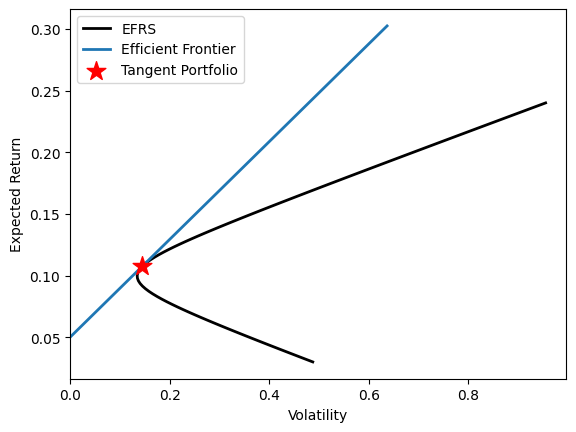

In [ ]:
plt.plot(EFRS_volatilities, EFRS_returns, label="EFRS", linewidth=2, color="k", zorder=1)
plt.xlim(0)
# plt.axhline(y=0, color="k")
plt.xlabel("Volatility")
plt.ylabel("Expected Return")

max_sharpe = (tangent_return - rf) / tangent_volatility

x = np.array([0, max(EFRS_volatilities) * 2 / 3])  # Volatility range
y = np.array([x[0] * max_sharpe + rf, x[1] * max_sharpe + rf])  # Corresponding returns

plt.plot(x, y, label="Efficient Frontier", linewidth=2, zorder=2)
plt.scatter(tangent_volatility, tangent_return, color="r", marker="*", s=200, label="Tangent Portfolio", zorder=3, )
plt.legend(loc="upper left")
plt.show()
